In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
%matplotlib notebook

In [154]:
df = pd.read_csv('allreviews.csv')

In [155]:
df.date = pd.to_datetime(df.date)

In [156]:
df.head()

,title,stars,date,r_title,text
0,Brave,3.0,2012-06-27,Beautiful looking film that doesn't match the ...,"This film is very beautifully done, the artist..."
1,Brave,5.0,2012-06-25,Brave has little Heart,I knew Brave was in trouble from the first few...
2,Brave,1.0,2012-07-13,Disappointed,"I love The Incredibles, Up, Shrek, Toy Story, ..."
3,Brave,4.0,2012-07-23,"okay for a Disney movie, poor for a Pixar",Pixar execs used to say that the story was ind...
4,Brave,3.0,2012-08-05,Very disappointing,I felt compelled to write a review to counter ...


In [178]:
class Sentences(object):
    def __init__(self, df):
        self.df = df
    
    def __iter__(self):
        self.sentences = []
        for paragraph in self.df.text:
            sents = sent_tokenize(paragraph)
            for sent in sents:
                yield word_tokenize(sent)

In [179]:
sentences = Sentences(df)

In [182]:
model = Word2Vec(sentences)

2018-01-16 21:09:22,613 : INFO : collecting all words and their counts
2018-01-16 21:09:22,617 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-01-16 21:09:25,116 : INFO : PROGRESS: at sentence #10000, processed 245420 words, keeping 15873 word types
2018-01-16 21:09:27,413 : INFO : PROGRESS: at sentence #20000, processed 476432 words, keeping 23311 word types
2018-01-16 21:09:29,684 : INFO : PROGRESS: at sentence #30000, processed 726559 words, keeping 31920 word types
2018-01-16 21:09:31,992 : INFO : PROGRESS: at sentence #40000, processed 979035 words, keeping 37158 word types
2018-01-16 21:09:34,193 : INFO : PROGRESS: at sentence #50000, processed 1214244 words, keeping 42227 word types
2018-01-16 21:09:36,682 : INFO : PROGRESS: at sentence #60000, processed 1452570 words, keeping 46498 word types
2018-01-16 21:09:39,151 : INFO : PROGRESS: at sentence #70000, processed 1692576 words, keeping 51339 word types
2018-01-16 21:09:41,660 : INFO : PROGRESS: 

2018-01-16 21:11:55,665 : INFO : PROGRESS: at 0.43% examples, 69626 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:11:56,742 : INFO : PROGRESS: at 0.59% examples, 70473 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:11:57,773 : INFO : PROGRESS: at 0.73% examples, 71556 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:11:58,828 : INFO : PROGRESS: at 0.88% examples, 71972 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:11:59,887 : INFO : PROGRESS: at 1.03% examples, 72210 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:12:00,964 : INFO : PROGRESS: at 1.18% examples, 72327 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:12:01,977 : INFO : PROGRESS: at 1.32% examples, 72897 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:12:03,041 : INFO : PROGRESS: at 1.47% examples, 73022 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:12:04,043 : INFO : PROGRESS: at 1.61% examples, 72842 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:12:05,092 : INFO : PROGRESS: at 1.75% examples, 72452 words/s, in_qsize 0, ou

2018-01-16 21:13:20,598 : INFO : PROGRESS: at 12.08% examples, 72639 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:21,670 : INFO : PROGRESS: at 12.21% examples, 72565 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:22,681 : INFO : PROGRESS: at 12.33% examples, 72463 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:23,737 : INFO : PROGRESS: at 12.49% examples, 72411 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:24,812 : INFO : PROGRESS: at 12.64% examples, 72418 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:25,890 : INFO : PROGRESS: at 12.80% examples, 72423 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:26,928 : INFO : PROGRESS: at 12.94% examples, 72464 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:28,013 : INFO : PROGRESS: at 13.09% examples, 72468 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:29,029 : INFO : PROGRESS: at 13.20% examples, 72297 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:13:30,064 : INFO : PROGRESS: at 13.31% examples, 72110 words/s, in_q

2018-01-16 21:14:45,640 : INFO : PROGRESS: at 23.34% examples, 71540 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:46,689 : INFO : PROGRESS: at 23.49% examples, 71560 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:47,722 : INFO : PROGRESS: at 23.64% examples, 71583 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:48,763 : INFO : PROGRESS: at 23.77% examples, 71566 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:49,817 : INFO : PROGRESS: at 23.92% examples, 71586 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:50,902 : INFO : PROGRESS: at 24.07% examples, 71593 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:51,925 : INFO : PROGRESS: at 24.21% examples, 71581 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:52,942 : INFO : PROGRESS: at 24.35% examples, 71612 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:53,975 : INFO : PROGRESS: at 24.50% examples, 71634 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:14:54,982 : INFO : PROGRESS: at 24.64% examples, 71672 words/s, in_q

2018-01-16 21:16:11,568 : INFO : PROGRESS: at 33.65% examples, 68881 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:12,751 : INFO : PROGRESS: at 33.76% examples, 68789 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:13,914 : INFO : PROGRESS: at 33.84% examples, 68647 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:15,008 : INFO : PROGRESS: at 33.95% examples, 68577 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:16,107 : INFO : PROGRESS: at 34.05% examples, 68481 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:17,200 : INFO : PROGRESS: at 34.13% examples, 68360 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:18,299 : INFO : PROGRESS: at 34.25% examples, 68292 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:19,416 : INFO : PROGRESS: at 34.39% examples, 68272 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:20,518 : INFO : PROGRESS: at 34.52% examples, 68231 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:16:21,611 : INFO : PROGRESS: at 34.67% examples, 68242 words/s, in_q

2018-01-16 21:17:37,349 : INFO : PROGRESS: at 43.94% examples, 67672 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:38,447 : INFO : PROGRESS: at 44.04% examples, 67603 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:39,451 : INFO : PROGRESS: at 44.14% examples, 67552 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:40,576 : INFO : PROGRESS: at 44.25% examples, 67497 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:41,630 : INFO : PROGRESS: at 44.33% examples, 67415 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:42,631 : INFO : PROGRESS: at 44.44% examples, 67404 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:43,680 : INFO : PROGRESS: at 44.59% examples, 67428 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:44,747 : INFO : PROGRESS: at 44.74% examples, 67447 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:45,811 : INFO : PROGRESS: at 44.87% examples, 67447 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:17:46,844 : INFO : PROGRESS: at 44.99% examples, 67434 words/s, in_q

2018-01-16 21:19:02,582 : INFO : PROGRESS: at 54.93% examples, 67728 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:03,648 : INFO : PROGRESS: at 55.07% examples, 67728 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:04,685 : INFO : PROGRESS: at 55.21% examples, 67731 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:05,717 : INFO : PROGRESS: at 55.36% examples, 67750 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:06,807 : INFO : PROGRESS: at 55.52% examples, 67778 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:07,817 : INFO : PROGRESS: at 55.66% examples, 67802 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:08,890 : INFO : PROGRESS: at 55.82% examples, 67833 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:09,904 : INFO : PROGRESS: at 55.97% examples, 67856 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:10,966 : INFO : PROGRESS: at 56.09% examples, 67839 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:19:11,990 : INFO : PROGRESS: at 56.22% examples, 67828 words/s, in_q

2018-01-16 21:20:28,164 : INFO : PROGRESS: at 65.78% examples, 67759 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:29,178 : INFO : PROGRESS: at 65.91% examples, 67764 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:30,246 : INFO : PROGRESS: at 66.04% examples, 67762 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:31,284 : INFO : PROGRESS: at 66.18% examples, 67764 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:32,351 : INFO : PROGRESS: at 66.33% examples, 67775 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:33,389 : INFO : PROGRESS: at 66.48% examples, 67793 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:34,474 : INFO : PROGRESS: at 66.62% examples, 67802 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:35,501 : INFO : PROGRESS: at 66.77% examples, 67819 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:36,519 : INFO : PROGRESS: at 66.92% examples, 67837 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:20:37,619 : INFO : PROGRESS: at 67.07% examples, 67856 words/s, in_q

2018-01-16 21:21:53,311 : INFO : PROGRESS: at 77.58% examples, 68558 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:54,322 : INFO : PROGRESS: at 77.72% examples, 68574 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:55,323 : INFO : PROGRESS: at 77.86% examples, 68591 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:56,392 : INFO : PROGRESS: at 78.00% examples, 68600 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:57,426 : INFO : PROGRESS: at 78.14% examples, 68613 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:58,445 : INFO : PROGRESS: at 78.29% examples, 68628 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:21:59,464 : INFO : PROGRESS: at 78.43% examples, 68642 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:22:00,499 : INFO : PROGRESS: at 78.57% examples, 68654 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:22:01,506 : INFO : PROGRESS: at 78.71% examples, 68670 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:22:02,540 : INFO : PROGRESS: at 78.86% examples, 68682 words/s, in_q

2018-01-16 21:23:18,532 : INFO : PROGRESS: at 88.04% examples, 68185 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:19,545 : INFO : PROGRESS: at 88.16% examples, 68177 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:20,557 : INFO : PROGRESS: at 88.28% examples, 68169 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:21,659 : INFO : PROGRESS: at 88.40% examples, 68154 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:22,758 : INFO : PROGRESS: at 88.52% examples, 68138 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:23,777 : INFO : PROGRESS: at 88.66% examples, 68152 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:24,819 : INFO : PROGRESS: at 88.79% examples, 68142 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:25,862 : INFO : PROGRESS: at 88.90% examples, 68131 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:26,896 : INFO : PROGRESS: at 89.02% examples, 68122 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:23:28,003 : INFO : PROGRESS: at 89.14% examples, 68116 words/s, in_q

2018-01-16 21:24:45,129 : INFO : PROGRESS: at 97.61% examples, 67091 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:46,142 : INFO : PROGRESS: at 97.73% examples, 67096 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:47,142 : INFO : PROGRESS: at 97.84% examples, 67093 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:48,200 : INFO : PROGRESS: at 97.97% examples, 67093 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:49,241 : INFO : PROGRESS: at 98.09% examples, 67087 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:50,348 : INFO : PROGRESS: at 98.21% examples, 67074 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:51,424 : INFO : PROGRESS: at 98.34% examples, 67073 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:52,424 : INFO : PROGRESS: at 98.44% examples, 67060 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:53,479 : INFO : PROGRESS: at 98.56% examples, 67052 words/s, in_qsize 0, out_qsize 0
2018-01-16 21:24:54,558 : INFO : PROGRESS: at 98.69% examples, 67051 words/s, in_q

In [183]:
model.save('word2vec.model')

2018-01-16 21:25:18,158 : INFO : saving Word2Vec object under word2vec.model, separately None
2018-01-16 21:25:18,159 : INFO : not storing attribute syn0norm
2018-01-16 21:25:18,161 : INFO : not storing attribute cum_table
2018-01-16 21:25:18,598 : INFO : saved word2vec.model


In [224]:
vocab = list(model.wv.vocab)

In [225]:
len(vocab)

40857

In [264]:
randword = random.choice(vocab)
print(randword)
model.wv.most_similar(randword)

giggled


[('chuckled', 0.7738407850265503),
 ('smiled', 0.7571359872817993),
 ('clapped', 0.7207626104354858),
 ('laughed', 0.7127578258514404),
 ('gasped', 0.6920688152313232),
 ('sighed', 0.6716338396072388),
 ('cried', 0.6669942736625671),
 ('cringed', 0.653756320476532),
 ('giggling', 0.6514192223548889),
 ('chuckling', 0.6397126913070679)]

In [304]:
word1, word2 = random.choice(vocab), random.choice(vocab)
print(word1, word2)
model.wv.similarity(word1, word2)

Siskel dangerous


-0.34729069897373444

In [309]:
model.wv.most_similar('tomorrow')

[('sometime', 0.6140000820159912),
 ('tonight', 0.5809112787246704),
 ('Thanksgiving', 0.5761794447898865),
 ('Anniversary', 0.5687763690948486),
 ('December', 0.547364354133606),
 ('Heaven', 0.540814220905304),
 ('September', 0.5384411811828613),
 ('July', 0.5327842235565186),
 ('Dreams', 0.5325707793235779),
 ('January', 0.5319467782974243)]

In [307]:
model.wv.similarity('today','yesterday')

0.29401890121553897

In [319]:
model.wv.most_similar(positive=['Jack', 'woman'], negative=['man'], topn=5)

[('Sally', 0.6642281413078308),
 ('Olivia', 0.6229469180107117),
 ('Calhoun', 0.6211115121841431),
 ('Basil', 0.6144192218780518),
 ('Vanellope', 0.609347403049469)]

In [191]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [264]:
randword = random.choice(vocab)
print(randword)
model.wv.most_similar(randword)

giggled


[('chuckled', 0.7738407850265503),
 ('smiled', 0.7571359872817993),
 ('clapped', 0.7207626104354858),
 ('laughed', 0.7127578258514404),
 ('gasped', 0.6920688152313232),
 ('sighed', 0.6716338396072388),
 ('cried', 0.6669942736625671),
 ('cringed', 0.653756320476532),
 ('giggling', 0.6514192223548889),
 ('chuckling', 0.6397126913070679)]

In [311]:
model.wv.most_similar(positive=['like','teh'],negative=['the'])

KeyError: "word 'teh' not in vocabulary"

<IPython.core.display.Javascript object>


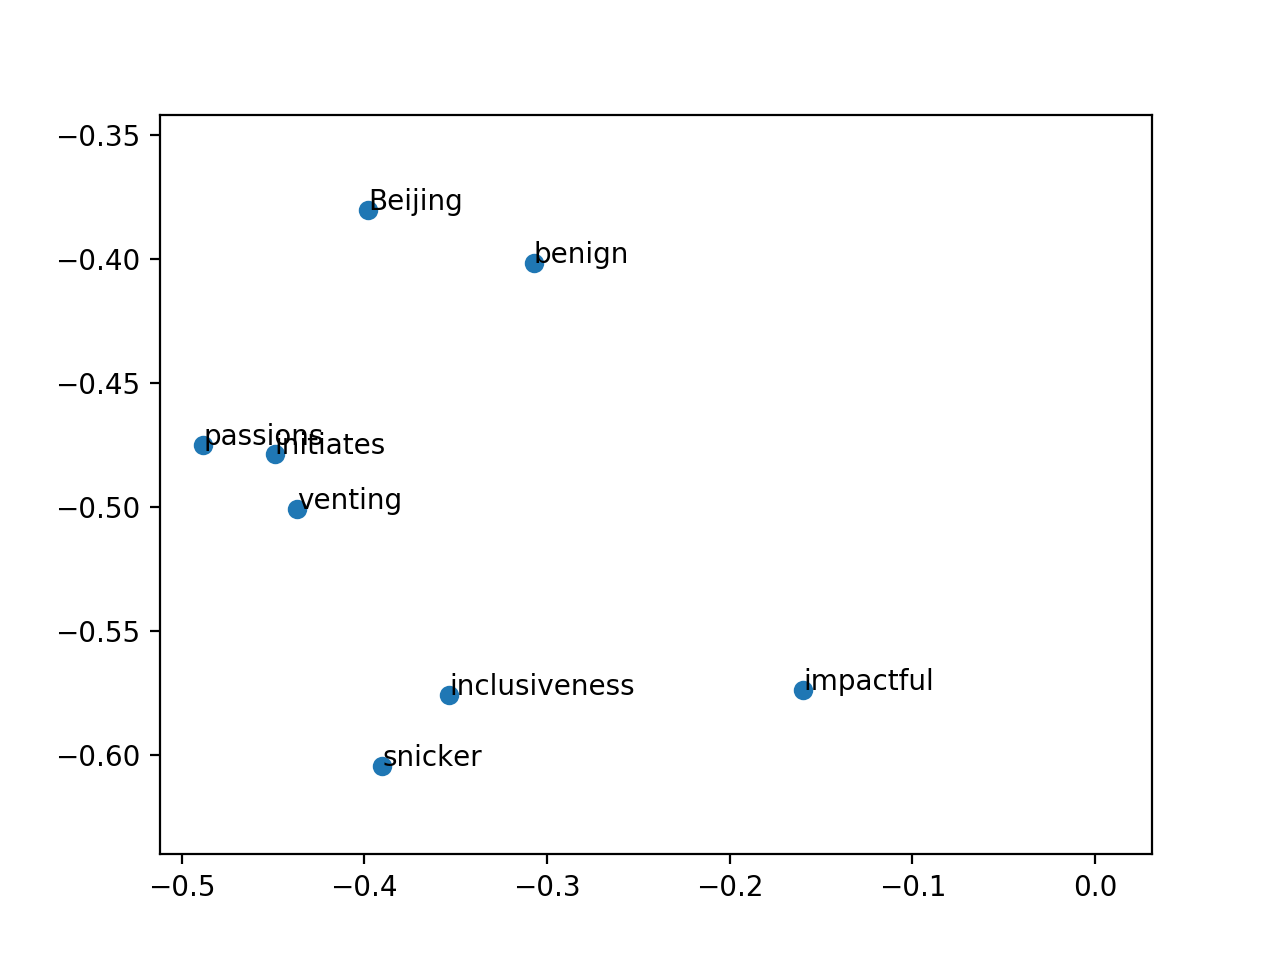

In [281]:
words = random.sample(vocab,20)
X = model.wv[words]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

plt.scatter(result[:,0],result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))